In [3]:
!pip install easyocr
!pip install imutils


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [21]:
!pip install matplotlib
!pip install torch
!pip install "numpy<2.0"


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [22]:
!pip3 install torch torchvision torchaudio


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [69]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import torch

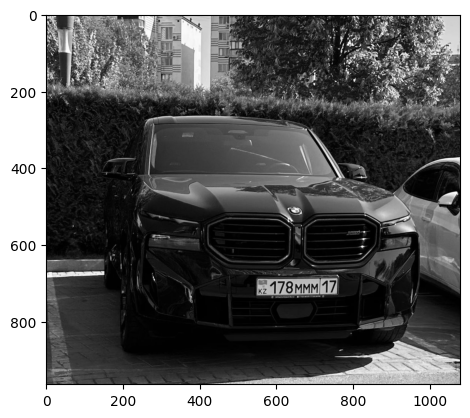

In [189]:
img = cv2.imread('sss.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

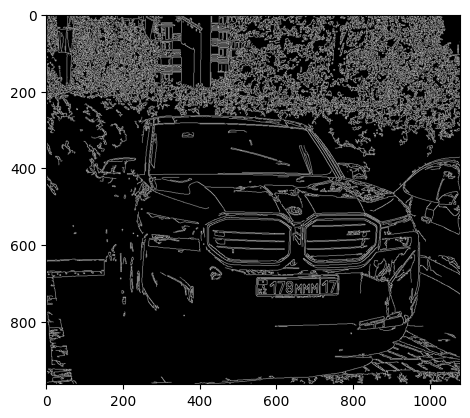

In [190]:
bfilter = cv2.bilateralFilter(gray, 11, 11, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [191]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [192]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [193]:
location

array([[[712, 689]],

       [[551, 690]],

       [[549, 731]],

       [[710, 730]]], dtype=int32)

In [194]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

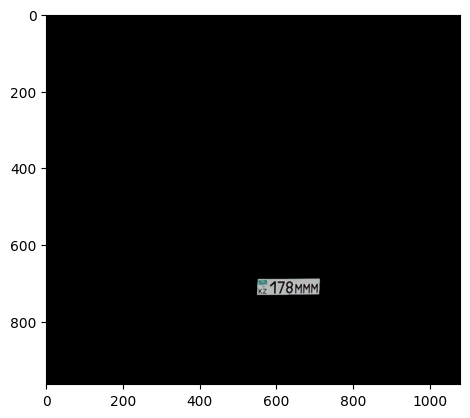

In [195]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [196]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

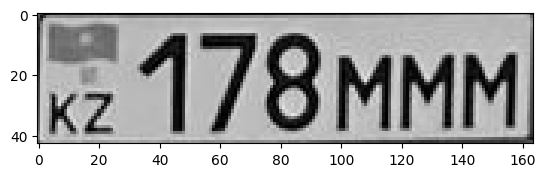

In [197]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [198]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 23], [29, 23], [29, 43], [0, 43]], 'KZ', 0.8085779882746398),
 ([[29, 1], [164, 1], [164, 43], [29, 43]], '178MMM', 0.9956269690376847)]

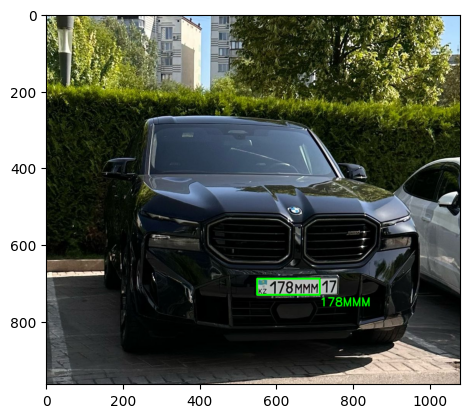

In [199]:
# Extract the second value '178MMM'
text = result[1][1]

font = cv2.FONT_HERSHEY_SIMPLEX
 # Coordinates for the bounding box

# Place the text on the image
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+70), 
                  fontFace=font, fontScale=1, color=(0, 255, 0), 
                  thickness=2, lineType=cv2.LINE_AA)

# Draw a rectangle around the detected text
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)

# Display the result
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
